In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from lkf_stats_tools import * 
from scipy.stats import gaussian_kde
from pyproj import Proj, transform



# Import Data



## Simulation Data

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# List of paths to the LKF objects of each simulation
simulation_paths = [
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_elip/Dataset_Detected_LKFs/MITgcm_4km_elip/object_lkf_elip.pkl',
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_elip1/Dataset_Detected_LKFs/MITgcm_4km_elip1/object_lkf_elip1.pkl',
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_elip2/Dataset_Detected_LKFs/MITgcm_4km_elip2/object_lkf_elip2.pkl',
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_elip3/Dataset_Detected_LKFs/MITgcm_4km_elip3/object_lkf_elip3.pkl',
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_mohr/Dataset_Detected_LKFs/MITgcm_4km_mohr/object_lkf_mohr.pkl',
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_tear/Dataset_Detected_LKFs/MITgcm_4km_tear/object_lkf_tear.pkl',
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_tem/Dataset_Detected_LKFs/MITgcm_4km_tem/object_lkf_tem.pkl'
]

# List of labels, markers, and colors for each simulation
simulation_labels = ['E2','E2,T','E1.5','E1.5,T','M.C.E.','Teardrop','T.E.M.']
markers = ['X', 'o', '^', 's', 'D', 'P', 'v']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'grey']

# Initialization of lists to store calculated values for each simulation
len_lkf_all = []
num_lkf_all = []
angles_conj_all = []
angles_non_conj_all = []
angles_all = []
lifetime_all = []
num_lkf_all_mean = []
mean_lkf_length_all = []
len_lkf_sim = []

lkf_lengths_dict = {label: {} for label in simulation_labels}
total_lkf_length_per_day = {label: [] for label in simulation_labels}

# Create the plot
plt.figure(figsize=(10, 5))

# Iterate over each simulation
for i, (simulation_path, label) in enumerate(zip(simulation_paths, simulation_labels)):
    # Load the simulation data
    with open(simulation_path, 'rb') as f:
        lkf = pickle.load(f)
    
    # Store the lengths of the LKFs for each day
    for day_index, len_day in enumerate(lkf.length.lkf_length[0]):
        day_lengths = [length / 1e3 for length in len_day]  # Convert to km
        lkf_lengths_dict[label][day_index] = day_lengths
    
    # Compute the average length of an LKF for each simulation
    mean_lkf_length_per_simulation = []
    
    for day_lengths in lkf_lengths_dict[label].values():
        mean_lkf_length_per_simulation.append(np.mean(day_lengths))
        total_lkf_length_per_day[label].append(np.sum(day_lengths))  # Total length per day

    mean_lkf_length_all.append(mean_lkf_length_per_simulation)
    
    # Compute the total number of LKFs for each day of the simulation
    num_lkf_sim = [len(lkf_day) for lkf_day in lkf.lkf_dataset[0]]
    lifetime_sim = np.concatenate([np.concatenate(lkf.lifetime.lkf_lifetime[0])])

    # Add the calculated values to the global list for all simulations
    num_lkf_all_mean.append(np.nanmean(num_lkf_sim))  # Average number of LKFs for the simulation
    num_lkf_all.append(num_lkf_sim)
    lifetime_all.append(lifetime_sim)

    # Compute the intersection angles for each simulation
    angles_conj = []
    angles_non_conj = []
    angles = []
    # Iterate over each day in the fault types
    for day_type, day_angles in zip(lkf.intersection.lkf_interc_type[0], lkf.intersection.lkf_interc[0]):
        # Find the indices of the conjugated faults (0)
        indices_0 = np.where(np.array(day_type) == 0)[0]
        indices_1 = np.where(np.array(day_type) == 1)[0]
        # Add the corresponding angles to the final list
        angles_conj.extend(np.array(day_angles)[indices_0])
        angles_non_conj.extend(np.array(day_angles)[indices_1])
        angles.extend(np.array(day_angles))
    # Convert to a flat list (optional, if the angles are sub-lists)
    angles_conj_all.append(angles_conj)
    angles_non_conj_all.append(angles_non_conj)
    angles_all.append(angles)


<Figure size 1000x500 with 0 Axes>

### Without Masking

In [14]:

# List of paths to the LKF objects of each simulation
simulation_paths_nomask = [
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_elip/Dataset_Detected_LKFs/MITgcm_4km_elip/object_lkf_elip_nomask.pkl',
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_elip1/Dataset_Detected_LKFs/MITgcm_4km_elip1/object_lkf_elip1_nomask.pkl',
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_elip2/Dataset_Detected_LKFs/MITgcm_4km_elip2/object_lkf_elip2_nomask.pkl',
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_elip3/Dataset_Detected_LKFs/MITgcm_4km_elip3/object_lkf_elip3_nomask.pkl',
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_mohr/Dataset_Detected_LKFs/MITgcm_4km_mohr/object_lkf_mohr_nomask.pkl',
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_tear/Dataset_Detected_LKFs/MITgcm_4km_tear/object_lkf_tear_nomask.pkl',
    '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_tem/Dataset_Detected_LKFs/MITgcm_4km_tem/object_lkf_tem_nomask.pkl'
]

# List of markers and colors for each simulation
markers = ['X', 'o', '^', 's', 'D', 'P', 'v']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'grey']

# Initialization of lists to store calculated values for each simulation
len_lkf_all_nomask = []
num_lkf_all_nomask = []
angles_conj_all_nomask = []
angles_non_conj_all_nomask = []
angles_all_nomask = []
lifetime_all_nomask = []
num_lkf_all_mean_nomask = []
mean_lkf_length_all_nomask = []
len_lkf_sim_nomask = []

lkf_lengths_dict_nomask = {label: {} for label in simulation_labels}
total_lkf_length_per_day_nomask = {label: [] for label in simulation_labels}

# Create the plot
plt.figure(figsize=(10, 5))

# Iterate over each simulation
for i, (simulation_path_nomask, label) in enumerate(zip(simulation_paths_nomask, simulation_labels)):
    # Load simulation data
    with open(simulation_path_nomask, 'rb') as f:
        lkf_nomask = pickle.load(f)
    
    
    # Store the lengths of the LKFs for each day
    for day_index, len_day in enumerate(lkf_nomask.length.lkf_length[0]):
        day_lengths_nomask = [length / 1e3 for length in len_day]  # Convert to km
        lkf_lengths_dict_nomask[label][day_index] = day_lengths_nomask
    
    # Compute the average length of an LKF for each simulation
    mean_lkf_length_per_simulation_nomask = []
    
    for day_lengths_nomask in lkf_lengths_dict_nomask[label].values():
        mean_lkf_length_per_simulation_nomask.append(np.mean(day_lengths_nomask))
        total_lkf_length_per_day_nomask[label].append(np.sum(day_lengths_nomask))  # Total length per day

    mean_lkf_length_all_nomask.append(mean_lkf_length_per_simulation_nomask)
    
    
    # Compute the total number of LKFs for each day of the simulation
    num_lkf_sim_nomask = [len(lkf_day_nomask) for lkf_day_nomask in lkf_nomask.lkf_dataset[0]]
    lifetime_sim_nomask = np.concatenate([np.concatenate(lkf_nomask.lifetime.lkf_lifetime[0])])

    # Add the calculated values to the global list for all simulations
    num_lkf_all_mean_nomask.append(np.nanmean(num_lkf_sim_nomask)) # Average number of LKFs for the simulation
    num_lkf_all_nomask.append(num_lkf_sim_nomask)
    lifetime_all_nomask.append(lifetime_sim_nomask)

    # Compute intersection angles for each simulation
    angles_conj_nomask = []
    angles_non_conj_nomask = []
    angles_nomask = []
    # Iterate over each day in the fault types
    for day_type_nomask, day_angles_nomask in zip(lkf_nomask.intersection.lkf_interc_type[0], lkf_nomask.intersection.lkf_interc[0]):
        # Find the indices of the conjugated faults (0)
        indices_0 = np.where(np.array(day_type_nomask) == 0)[0]
        indices_1 = np.where(np.array(day_type_nomask) == 1)[0]
        # Add the corresponding angles to the final list
        angles_conj_nomask.extend(np.array(day_angles_nomask)[indices_0])
        angles_non_conj_nomask.extend(np.array(day_angles_nomask)[indices_1])
        angles.extend(np.array(day_angles_nomask))
    # Convert to a flat list (optional, if the angles are sub-lists)
    angles_conj_all_nomask.append(angles_conj_nomask)
    angles_non_conj_all_nomask.append(angles_non_conj_nomask)
    angles_all_nomask.append(angles_nomask)

<Figure size 1000x500 with 0 Axes>

## RGPS Data

### Compute RGPS lengths and number

In [20]:
import numpy as np
import pandas as pd
from datetime import datetime

class LKFProcessor:
    def __init__(self, file_path, resolution_km_per_pixel):
        self.file_path = file_path
        self.resolution_km_per_pixel = resolution_km_per_pixel
        self.lkf_length = pd.DataFrame()
        self.total_length_by_day = pd.DataFrame()
        self.lkf_count_by_day = pd.DataFrame()

    def read_data(self):
        self.data = pd.read_csv(self.file_path, sep='\t')

    def filter_data(self):
        # Create a date string and convert to datetime
        self.data['Start_Date'] = pd.to_datetime(self.data['Start_Year'].astype(str) + '-' +
                                                 self.data['Start_Month'].astype(str) + '-' +
                                                 self.data['Start_Day'].astype(str))

        # Filter by date range
        start_date = datetime(2008, 1, 1)
        end_date = datetime(2008, 3, 25)
        self.filtered_data = self.data[(self.data['Start_Date'] >= start_date) & (self.data['Start_Date'] <= end_date)]

    def compute_length(self):
        self.filtered_data['Date'] = self.filtered_data['Start_Date'].dt.date
        grouped = self.filtered_data.groupby(['Date', 'LKF_No.'])

        length_data = []
        for (date, lkf_no), group in grouped:
            if len(group) > 1:
                coords = list(zip(group['ind_x'].values, group['ind_y'].values))
                pixel_distances = np.sqrt(np.diff([x for x, y in coords])**2 + np.diff([y for x, y in coords])**2)
                km_distances = pixel_distances * self.resolution_km_per_pixel
                total_length_km = np.sum(km_distances)
                length_data.append((date, lkf_no, total_length_km))
        
        self.lkf_length = pd.DataFrame(length_data, columns=['Date', 'LKF_No', 'Length'])

    def compute_total_length_by_day(self):
        # Group by date and sum the lengths
        self.total_length_by_day = self.lkf_length.groupby('Date')['Length'].sum().reset_index()

    def compute_lkf_count_by_day(self):
        # Group by date and count the number of unique LKF_No
        self.lkf_count_by_day = self.lkf_length.groupby('Date')['LKF_No'].nunique().reset_index()
        self.lkf_count_by_day.columns = ['Date', 'LKF_Count']

    
    def process(self):
        self.read_data()
        self.filter_data()
        self.compute_length()
        self.compute_total_length_by_day()
        self.compute_lkf_count_by_day()

# Use class
file_path = '/home/eva/Documents/AWI/Comparison_RGPS_Simu/RGPS/w0708/LKF_RGPS_w0708.txt'
resolution_km_per_pixel = 12.5
lkf_processor = LKFProcessor(file_path, resolution_km_per_pixel)
lkf_processor.process()

# Get LKFs total length per day
total_length_by_day = lkf_processor.total_length_by_day

# Get LKFs number per day
lkf_count_by_day = lkf_processor.lkf_count_by_day

# Individual lengths of LKF are stocked in lkf_processor.lkf_length
lkf_length = lkf_processor.lkf_length


/tmp/ipykernel_98464/552910674.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.filtered_data['Date'] = self.filtered_data['Start_Date'].dt.date


### Compute RGPS Intersection Angles

In [21]:
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.optimize import linprog
from scipy.io import savemat
import os
from pyproj import Proj

class LKFProcessor:
    def __init__(self, file_path):
        self.file_path = file_path
        self.lkf_dataset = None
        self.lkf_intersections = None
        self.lkf_angles = None
    


    def read_data(self):
        # Read LKF data from .csv file
        self.lkf_dataset = pd.read_csv(self.file_path, delimiter='\t')
        #self.lkf_dataset = df.groupby(0).apply(lambda x: np.array(x.iloc[:, 1:])).tolist()

    def filter_data(self):
        # Create a date string and convert to datetime
        self.lkf_dataset['Start_Date'] = pd.to_datetime(self.lkf_dataset['Start_Year'].astype(str) + '-' +
                                                 self.lkf_dataset['Start_Month'].astype(str) + '-' +
                                                 self.lkf_dataset['Start_Day'].astype(str))

        # Filter by date range
        start_date = datetime(2008, 1, 1)
        end_date = datetime(2008, 3, 25)
        self.lkf_dataset = self.lkf_dataset[(self.lkf_dataset['Start_Date'] >= start_date) & (self.lkf_dataset['Start_Date'] <= end_date)]
        self.lkf_dataset['Date'] = self.lkf_dataset['Start_Date'].dt.date
    
    def adjust_lkf_no(self, value_to_subtract):
        # Subtract a given value from the LKF_No. column
        self.lkf_dataset['LKF_No.'] = self.lkf_dataset['LKF_No.'] - value_to_subtract


    def detect_intersections(self):
        self.lkf_angles = []
        self.lkf_intersections = []
        num_p = 10
        def lkf_poly_fit_p(xy,deg):
            x,y = xy
            if x.size-1<deg:
                deg=x.size-1
            t = np.arange(x.size)
            p_x = np.polyfit(t,x,deg)
            p_y = np.polyfit(t,y,deg)
            return p_x,p_y

        m = Proj(proj='stere',lat_0=90, lat_ts=75, lon_0=-45, ellps='WGS84')    
        
        if self.lkf_dataset is None:
            raise ValueError("No LKF dataset loaded. Please call read_data() first.")
        
        for date, day_dataset in self.lkf_dataset.groupby('Date'):

            lkf_map = np.zeros((248, 264))  # Adjust depending on data shape

            for iseg, seg_i in day_dataset.groupby('LKF_No.'):
                #seg_i = np.stack((seg_i[1]['ind_x'], seg_i[1]['ind_y'])).T
                lkf_map[seg_i['ind_x'].astype('int'),seg_i['ind_y'].astype('int')] += iseg

            lkf_intersections = []
            lkf_angles = []

            for iseg,  seg_i in day_dataset.groupby('LKF_No.'):
                #day_data = np.stack((day_dataset[1]['ind_x'], day_dataset[1]['ind_y'])).T
                #seg_i = np.stack((seg_i[1]['ind_x'], seg_i[1]['ind_y'])).T
                search_ind = np.zeros(lkf_map.shape, dtype=bool)

                # Define a search zone around seg_i
                dis_par = 1 # Adjust search zone size if necessary
                for ix in range(-dis_par, dis_par + 1):
                    for iy in range(-dis_par, dis_par + 1):
                         if np.all([seg_i['ind_x'].astype('int')+ix >= 0, seg_i['ind_x'].astype('int')+ix < search_ind.shape[0]]):
                                if np.all([seg_i['ind_y'].astype('int')+iy >= 0, seg_i['ind_y'].astype('int')+iy < search_ind.shape[1]]):
                                    search_ind[seg_i['ind_x'].astype('int')+ix,seg_i['ind_y'].astype('int')+iy] = True
                    search_ind[seg_i['ind_x'].astype('int')  ,seg_i['ind_y'].astype('int')  ] = False
                    
                intercep_points = np.where(search_ind & (lkf_map != 0))
                intercep_partners, intercep_counts = np.unique(lkf_map[intercep_points], return_counts=True)

                for ipar, pari in enumerate(intercep_partners):
                    if pari > iseg and pari < np.max(day_dataset['LKF_No.']):
                        # Find the closest interseciton point
                        dis_intercep = np.zeros(intercep_counts[ipar])
                        for iintc in range(intercep_counts[ipar]):
                            dis_intercep[iintc] = np.min(np.sqrt((seg_i['ind_x'] -
                                                                  intercep_points[0][lkf_map[intercep_points] == pari][
                                                                      iintc]) ** 2 +
                                                                 (seg_i['ind_y'] -
                                                                  intercep_points[1][lkf_map[intercep_points] == pari][
                                                                      iintc]) ** 2))
                        intcp = (intercep_points[0][lkf_map[intercep_points] == pari][np.argmin(dis_intercep)],
                                 intercep_points[1][lkf_map[intercep_points] == pari][np.argmin(dis_intercep)])

                        # Estimate seg_i orientation near the intersection point
                        #ind_range_seg = np.arange(max(0, np.argmin(np.sqrt((seg_i['ind_x'] - intcp[0]) ** 2 +
                        #                                                     (seg_i['ind_y'] - intcp[1]) ** 2)) - 1),
                        #                          min(seg_i.shape[0],
                        #                              np.argmin(np.sqrt((seg_i['ind_x'] - intcp[0]) ** 2 +
                        #                                                 (seg_i['ind_y'] - intcp[1]) ** 2)) + 2))

                        ind = np.argmin(np.sqrt((seg_i['ind_x'] - intcp[0])**2 + 
                                                (seg_i['ind_y'] - intcp[1])**2))
                        ind = np.array([np.max([0,ind-num_p]),
                                            np.min([seg_i.shape[0],ind+num_p+1])])
                        p_x,p_y = lkf_poly_fit_p(m(np.array(seg_i['lon'])[ind[0]:ind[1]],
                                                np.array(seg_i['lat'])[ind[0]:ind[1]]),1) # Linear fit
                        p = p_y[0]/p_x[0]
                        
                        # Determine angle from linear fit
                        if np.isnan(p):
                            ang_i = 90.
                        else:
                            ang_i = np.arctan(p)/np.pi*180.
                        
                        #p_x, p_y = lkf_poly_fit(np.array(seg_i['ind_x'])[ind_range_seg], np.array(seg_i['ind_y'])[ind_range_seg], 1)
                        #p = p_y[0] / p_x[0] if p_x[0] != 0 else np.inf
                        #ang_i = np.arctan(p) / np.pi * 180 if not np.isnan(p) else 90.

                        # Estimate pari orientation near the intersection point
                        lkf_par = day_dataset[day_dataset['LKF_No.']== int(pari)]
                        #ind_range_par = np.arange(max(0, np.argmin(np.sqrt((lkf_par['ind_x'] - intcp[0]) ** 2 +
                        #                                                     (lkf_par['ind_y'] - intcp[1]) ** 2)) - 1),
                        #                          min(lkf_par.shape[0],
                        #                              np.argmin(np.sqrt((lkf_par['ind_x'] - intcp[0]) ** 2 +
                        #                                                 (lkf_par['ind_y'] - intcp[1]) ** 2)) + 2))
                        #p_x, p_y = lkf_poly_fit(np.array(lkf_par['ind_x'])[ind_range_par], np.array(lkf_par['ind_y'])[ind_range_par], 1)
                        #p = p_y[0] / p_x[0] if p_x[0] != 0 else np.inf
                        #ang_ii = np.arctan(p) / np.pi * 180 if not np.isnan(p) else 90.
                        
                        ind = np.argmin(np.sqrt((lkf_par['ind_x'] - intcp[0])**2 + 
                                                    (lkf_par['ind_y'] - intcp[1])**2))
                        ind = np.array([np.max([0,ind-num_p]),
                                            np.min([lkf_par.shape[0],ind+num_p+1])])
                        p_x,p_y = lkf_poly_fit_p(m(np.array(lkf_par['lon'])[ind[0]:ind[1]],
                                                     np.array(lkf_par['lat'])[ind[0]:ind[1]]),1) # Linear fit
                        p = p_y[0]/p_x[0]
                        # Determine angle from linear fit
                        if np.isnan(p):
                            ang_ii = 90.
                        else:
                            ang_ii = np.arctan(p)/np.pi*180.
                        
                        
                        # Compute angle difference
                        angdiff = np.abs(ang_ii - ang_i)
                        #if angdiff > 90:
                        #    angdiff = 180 - angdiff

                        # Save the results
                        lkf_angles.append(angdiff)
                        lkf_intersections.append((iseg, pari))

            # Stocker the results for the current day
            self.lkf_intersections.append(lkf_intersections)
            self.lkf_angles.append(lkf_angles)
    
    def process(self,value_to_subtract):
        self.read_data()
        self.filter_data()
        self.adjust_lkf_no(value_to_subtract)
        self.detect_intersections()

file_path = '/home/eva/Documents/AWI/Comparison_RGPS_Simu/RGPS/w0708/LKF_RGPS_w0708.txt'
processor = LKFProcessor(file_path)
value_to_subtract = 1599
processor.process(value_to_subtract)
flattened_angles = [angle for sublist in processor.lkf_angles for angle in sublist]



### Compute RGPS lifetime

In [22]:
import pandas as pd
import numpy as np

# Étape 1 : Read data from .txt file
file_path = '/home/eva/Documents/AWI/Comparison_RGPS_Simu/RGPS/w0708/LKF_RGPS_w0708.txt'
data = pd.read_csv(file_path, delimiter='\t')

# Convert date columns to a single date format if necessary
data['Start_Date'] = pd.to_datetime(data['Start_Year'].astype(str) + '-' +
                                    data['Start_Month'].astype(str) + '-' +
                                    data['Start_Day'].astype(str))


# Filter data between January 1, 2008 and March 25, 2008
start_date_filter = pd.to_datetime('2008-01-01')
end_date_filter = pd.to_datetime('2008-03-25')
filtered_data = data[(data['Start_Date'] >= start_date_filter) & (data['Start_Date'] <= end_date_filter)]

# Step 2: Reorganize data
years = filtered_data['Start_Year'].unique()
lkf_dataset = {year: [] for year in years}
lkf_track_data = {year: [] for year in years}


for year in years:
    yearly_data = filtered_data[filtered_data['Start_Year'] == year]
    dates = yearly_data['Start_Date'].unique()
    for date in dates:
        day_data = yearly_data[yearly_data['Start_Date'] == date]
        # Keep only the first point of each LKF
        day_data = day_data.groupby('LKF_No.').first().reset_index()
        lkf_dataset[year].append(day_data)
        
        #if date != dates[-1]:
        #    next_day_data = yearly_data[yearly_data['Start_Date'] == date + pd.Timedelta(days=3)]
        #    next_day_data = next_day_data.groupby('LKF_No.').first().reset_index()
        #    track_data = []
        #    for _, lkf in day_data.iterrows():
        #        for _, next_lkf in next_day_data.iterrows():
        #            parent_lkfs = str(next_lkf['Parent_LKF_No.']).split(',')
        #            if str(lkf['LKF_No.']) in parent_lkfs:
        #            #if lkf['LKF_No.'] == next_lkf['Parent_LKF_No.']:
        #                track_data.append([lkf['LKF_No.'], next_lkf['LKF_No.']])
        #    lkf_track_data[year].append(np.array(track_data))
# Save tracking :
#import pickle

# Save lkf_track_data to a file
#with open('/home/eva/Documents/AWI/track_rgps.pkl', 'wb') as file:
#    pickle.dump(lkf_track_data, file)
# Load tracking :
with open('/home/eva/Documents/AWI/track_rgps.pkl', 'rb') as file:
    lkf_track_data = pickle.load(file)
#lkf_track_data = np.load('/home/eva/Documents/AWI/track_rgps.npy')

# Step 3: Compute LKF lifetime
lkf_lifetime = []

for year in years:
    lkf_year = lkf_dataset[year]
    life_year = [np.ones((len(day_data),)) for day_data in lkf_year]
    
    for it, track in enumerate(lkf_track_data[year]):
        if track.size > 0:
            # Create a mapping dictionary for the current day
            current_day_data = lkf_year[it]
            next_day_data = lkf_year[it + 1]
            current_mapping = {lkf_no: idx for idx, lkf_no in enumerate(current_day_data['LKF_No.'])}
            next_mapping = {lkf_no: idx for idx, lkf_no in enumerate(next_day_data['LKF_No.'])}
            
            for (parent_lkf, child_lkf) in track:
                parent_idx = current_mapping[int(parent_lkf)]
                child_idx = next_mapping[int(child_lkf)]
                life_year[it + 1][child_idx] += life_year[it][parent_idx]

    lkf_lifetime.append(life_year)

# Flattend for histogram
all_lifetimes = np.concatenate([np.concatenate(year_lifetimes) for year_lifetimes in lkf_lifetime])

# PLOT


## Number of LKFs

### Boxplots

#### Mask

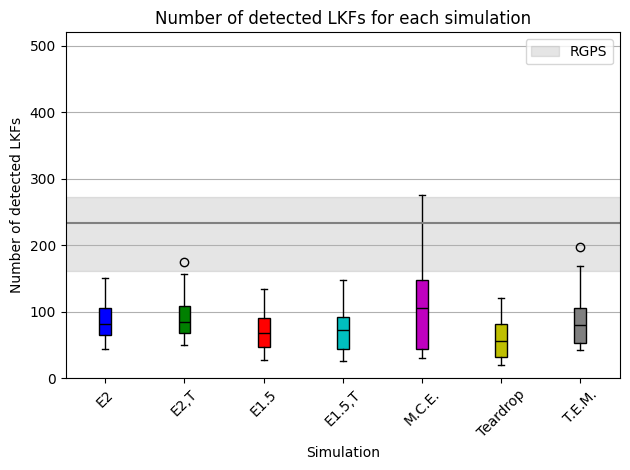

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot boxplots for each simulation
for i in range(len(simulation_paths)):
    box = ax.boxplot(num_lkf_all[i], positions=[i], patch_artist=True, labels=[label in simulation_labels])
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])
    for median in box['medians']:
        median.set(color='k', linewidth=1)
# Mean line and variability interval for 'lkf_count_by_day'
y_min = np.min(lkf_count_by_day['LKF_Count']) #- np.std(lkf_count_by_day['LKF_Count'])
y_max = np.max(lkf_count_by_day['LKF_Count'])# + np.std(lkf_count_by_day['LKF_Count'])
ax.plot(np.arange(-1, len(simulation_paths) + 1), np.full((len(simulation_paths) + 2,), np.nanmean(lkf_count_by_day['LKF_Count'])), marker='', color='grey')
ax.fill_between(np.arange(-1, len(simulation_paths) + 1), y_min, y_max, color='grey', alpha=0.2, label='RGPS')

# Configuration of x-axis labels
ax.set_xticks(ticks=np.arange(len(simulation_paths)), labels=simulation_labels, rotation=45)

# Add legends
ax.legend()#loc='center left', bbox_to_anchor=(1, 0.5))

# Title and axis labels
ax.set_ylabel('Number of detected LKFs')
ax.set_xlabel('Simulation')
ax.set_title('Number of detected LKFs for each simulation')
ax.set_ylim(0, 520)
ax.set_xlim(-0.5, len(simulation_paths) - 0.5)
ax.grid(axis='y')
# Display the graph
fig.tight_layout()
#plt.savefig('/home/eva/Documents/AWI/Comparison_RGPS_Simu/Plots/map_eps_tot/Number_LKF_nomask.svg')
plt.show()


#### No Mask

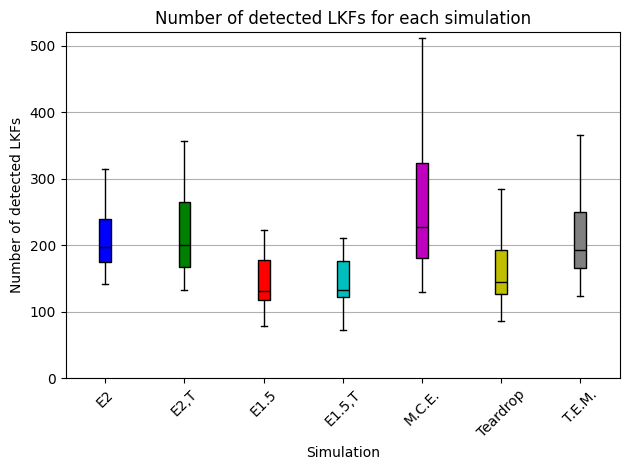

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot boxplots for each simulation
for i in range(len(simulation_paths_nomask)):
    box = ax.boxplot(num_lkf_all_nomask[i], positions=[i], patch_artist=True, labels=[label in simulation_labels])
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])
    for median in box['medians']:
        median.set(color='k', linewidth=1)

# Configuration of x-axis labels
ax.set_xticks(ticks=np.arange(len(simulation_paths)), labels=simulation_labels, rotation=45)

# Title and axis labels
ax.set_ylabel('Number of detected LKFs')
ax.set_xlabel('Simulation')
ax.set_title('Number of detected LKFs for each simulation')
ax.set_ylim(0, 520)
#ax.set_xlim(-0.5, len(simulation_paths) - 0.5)
ax.grid(axis='y')
# Display Plot
fig.tight_layout()
#plt.savefig('/home/eva/Documents/AWI/Comparison_RGPS_Simu/Plots/map_eps_tot/Number_LKF.svg')
plt.show()


#### Both

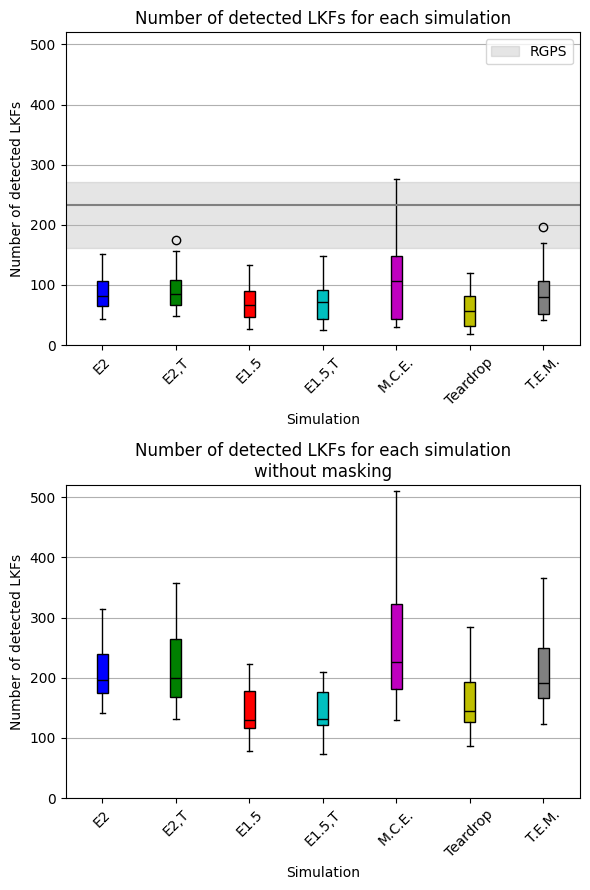

In [35]:
import numpy as np
import matplotlib.pyplot as plt


# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

# Figure 1 : Mask
for i in range(len(simulation_paths)):
    box = ax1.boxplot(num_lkf_all[i], positions=[i], patch_artist=True, labels=[label in simulation_labels])
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])
    for median in box['medians']:
        median.set(color='k', linewidth=1)
# Mean line and variability interval for 'lkf_count_by_day'
y_min = np.min(lkf_count_by_day['LKF_Count']) #- np.std(lkf_count_by_day['LKF_Count'])
y_max = np.max(lkf_count_by_day['LKF_Count'])# + np.std(lkf_count_by_day['LKF_Count'])
ax1.plot(np.arange(-1, len(simulation_paths) + 1), np.full((len(simulation_paths) + 2,), np.nanmean(lkf_count_by_day['LKF_Count'])), marker='', color='grey')
ax1.fill_between(np.arange(-1, len(simulation_paths) + 1), y_min, y_max, color='grey', alpha=0.2, label='RGPS')
# Configuration of x-axis labels
ax1.set_xticks(ticks=np.arange(len(simulation_paths)), labels=simulation_labels, rotation=45)

# Add legends
ax1.legend()#loc='center left', bbox_to_anchor=(1, 0.5))

# Title and axis labels
ax1.set_ylabel('Number of detected LKFs')
ax1.set_xlabel('Simulation')
ax1.set_title('Number of detected LKFs for each simulation')
ax1.set_ylim(0, 520)
ax1.set_xlim(-0.5, len(simulation_paths) - 0.5)
ax1.grid(axis='y')


# Figure 2 : No Mask
for i in range(len(simulation_paths_nomask)):
    box = ax2.boxplot(num_lkf_all_nomask[i], positions=[i], patch_artist=True)
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])
    for median in box['medians']:
        median.set(color='k', linewidth=1)
ax2.set_xticks(ticks=np.arange(len(simulation_paths_nomask)), labels=simulation_labels, rotation=45)
ax2.set_ylabel('Number of detected LKFs')
ax2.set_xlabel('Simulation')
ax2.set_title('Number of detected LKFs for each simulation\nwithout masking')
ax2.set_ylim(0, 520)
ax2.set_xlim(-0.5, len(simulation_paths_nomask) - 0.5)
ax2.grid(axis='y')

# Adjust display
fig.tight_layout()
#plt.savefig('/home/eva/Documents/AWI/Comparison_RGPS_Simu/Plots/map_eps_tot/Number_LKF_combined_subplot.svg')
plt.show()


In [223]:
print('Mean number of LKFs : '+ 'RGPS' + ' : ' + str(np.round(np.nanmean(lkf_count_by_day['LKF_Count']),1)))
for i in range(7): 
    print('Mean number of LKFs : '+ simulation_labels[i] + ' : ' + str(np.round(np.nanmedian(num_lkf_all[i]),1)))

Mean number of LKFs : RGPS : 233.3
Mean number of LKFs : E2 : 82.0
Mean number of LKFs : E2,T : 85.0
Mean number of LKFs : E1.5 : 67.0
Mean number of LKFs : E1.5,T : 72.0
Mean number of LKFs : M.C.E. : 106.0
Mean number of LKFs : Teardrop : 56.0
Mean number of LKFs : T.E.M. : 80.0


In [222]:
print('Mean number of LKFs : '+ 'RGPS' + ' : ' + str(np.round(np.nanmean(lkf_count_by_day['LKF_Count']),1)))
for i in range(7): 
    print('Mean number of LKFs : '+ simulation_labels[i] + ' : ' + str(np.round(np.nanmedian(num_lkf_all_nomask[i]),1)))

Mean number of LKFs : RGPS : 233.3
Mean number of LKFs : E2 : 196.5
Mean number of LKFs : E2,T : 200.0
Mean number of LKFs : E1.5 : 130.5
Mean number of LKFs : E1.5,T : 132.0
Mean number of LKFs : M.C.E. : 226.5
Mean number of LKFs : Teardrop : 144.0
Mean number of LKFs : T.E.M. : 192.0


## Total Length

### Boxplots

#### Mask

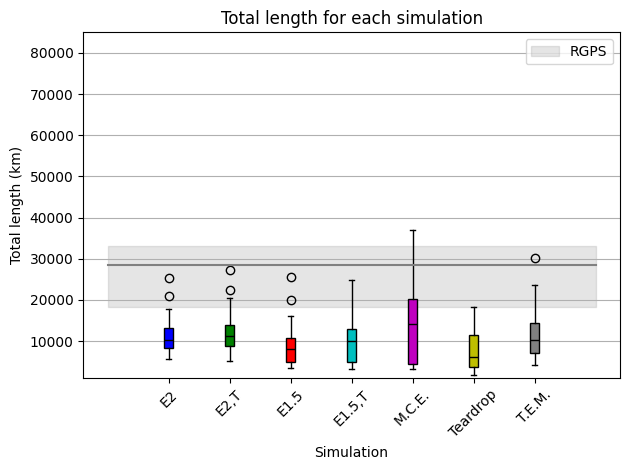

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot boxplots for each simulation
for i, simulation_label in enumerate(simulation_labels):
    box = ax.boxplot(total_lkf_length_per_day[simulation_label], positions=[i], patch_artist=True)#, labels= simulation_labels)
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])
    for median in box['medians']:
        median.set(color='k', linewidth=1)
# Mean line and variability interval for 'lkf_count_by_day'
y_min = np.min(total_length_by_day['Length']) #- np.std(lkf_count_by_day['LKF_Count'])
y_max = np.max(total_length_by_day['Length'])# + np.std(lkf_count_by_day['LKF_Count'])
ax.plot(np.arange(-1, len(simulation_paths) + 1), np.full((len(simulation_paths) + 2,), np.nanmean(total_length_by_day['Length'])), marker='', color='grey')
ax.fill_between(np.arange(-1, len(simulation_paths) + 1), y_min, y_max, color='grey', alpha=0.2, label='RGPS')

# Configuration of x-axis labels
ax.set_xticks(ticks=np.arange(len(simulation_paths)), labels=simulation_labels, rotation=45)

# Add legends
ax.legend()#loc='center left', bbox_to_anchor=(1, 0.5))

# Title and axis labels
ax.set_xlabel('Simulation')
ax.set_ylabel('Total length (km)')
ax.set_title('Total length for each simulation')
ax.set_ylim(1000, 85000)
#ax.set_xlim(-0.5, len(simulation_paths) - 0.5)
ax.grid(axis='y')
# Display Plot
fig.tight_layout()
#plt.savefig('/home/eva/Documents/AWI/Comparison_RGPS_Simu/Plots/map_eps_tot/Total_length_LKF.svg')
plt.show()


#### No Mask

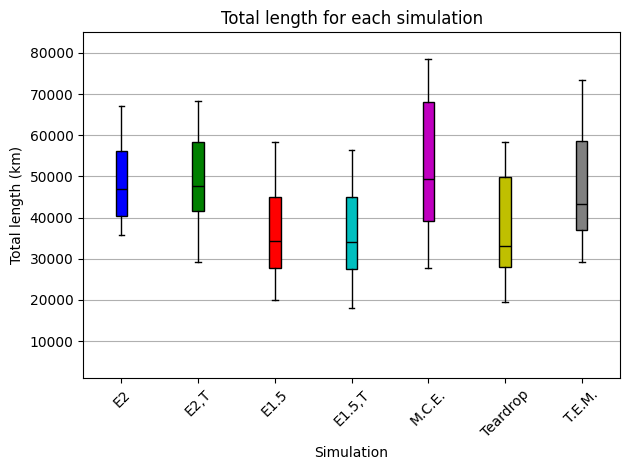

In [11]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot boxplots for each simulation
for i, simulation_label in enumerate(simulation_labels):
    box = ax.boxplot(total_lkf_length_per_day_nomask[simulation_label], positions=[i], patch_artist=True)#, labels= simulation_labels)
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])
    for median in box['medians']:
        median.set(color='k', linewidth=1)

# Configuration of x-axis labels
ax.set_xticks(ticks=np.arange(len(simulation_paths)), labels=simulation_labels, rotation=45)

# Title and axis labels
ax.set_xlabel('Simulation')
ax.set_ylabel('Total length (km)')
ax.set_title('Total length for each simulation')
ax.set_ylim(1000, 85000)
#ax.set_xlim(-0.5, len(simulation_paths) - 0.5)
ax.grid(axis='y')
# Display Plot
fig.tight_layout()
plt.savefig('/home/eva/Documents/AWI/Comparison_RGPS_Simu/Plots/map_eps_tot/Total_length_LKF_nomask.svg')
plt.show()


#### Both

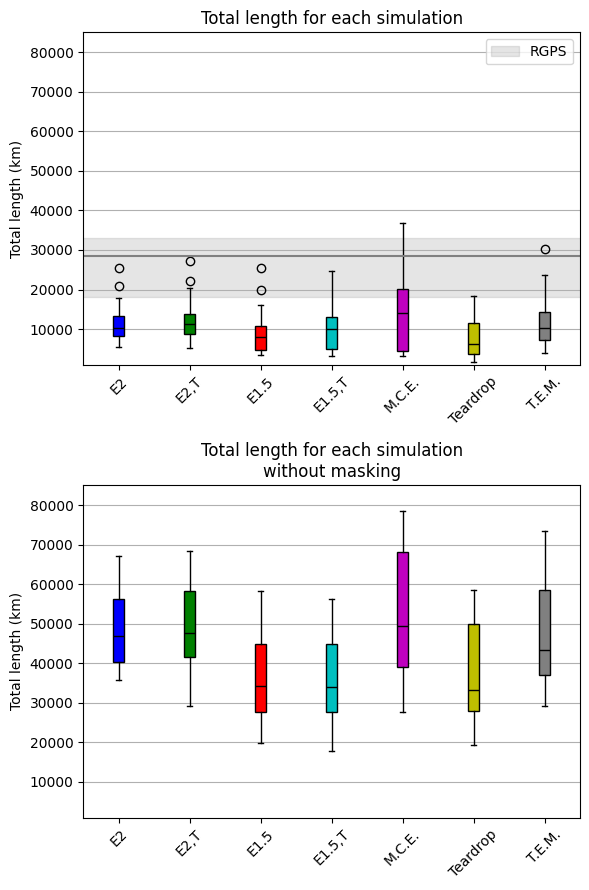

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Création de la figure et des axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

# Figure 1 : Mask
for i, simulation_label in enumerate(simulation_labels):
    box = ax1.boxplot(total_lkf_length_per_day[simulation_label], positions=[i], patch_artist=True)#, labels= simulation_labels)
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])
    for median in box['medians']:
        median.set(color='k', linewidth=1)
# Mean line and variability interval for 'lkf_count_by_day'
y_min = np.min(total_length_by_day['Length']) #- np.std(lkf_count_by_day['LKF_Count'])
y_max = np.max(total_length_by_day['Length'])# + np.std(lkf_count_by_day['LKF_Count'])
ax1.plot(np.arange(-1, len(simulation_paths) + 1), np.full((len(simulation_paths) + 2,), np.nanmean(total_length_by_day['Length'])), marker='', color='grey')
ax1.fill_between(np.arange(-1, len(simulation_paths) + 1), y_min, y_max, color='grey', alpha=0.2, label='RGPS')
# Configuration of x-axis labels
ax1.set_xticks(ticks=np.arange(len(simulation_paths)), labels=simulation_labels, rotation=45)

# Add legends
ax1.legend()#loc='center left', bbox_to_anchor=(1, 0.5))

# Title and axis labels
ax1.set_ylabel('Number of detected LKFs')
ax1.set_ylabel('Total length (km)')
ax1.set_title('Total length for each simulation')
ax1.set_ylim(1000, 85000)
ax1.set_xlim(-0.5, len(simulation_paths) - 0.5)
ax1.grid(axis='y')


# Figure 2 : No Mask
for i, simulation_label in enumerate(simulation_labels):
    box = ax2.boxplot(total_lkf_length_per_day_nomask[simulation_label], positions=[i], patch_artist=True)#, labels= simulation_labels)
    for patch in box['boxes']:
        patch.set_facecolor(colors[i])
    for median in box['medians']:
        median.set(color='k', linewidth=1)
ax2.set_xticks(ticks=np.arange(len(simulation_paths_nomask)), labels=simulation_labels, rotation=45)
ax2.set_ylabel('Number of detected LKFs')
ax2.set_ylabel('Total length (km)')
ax2.set_title('Total length for each simulation\nwithout masking')
ax2.set_ylim(1000, 85000)
ax2.set_xlim(-0.5, len(simulation_paths) - 0.5)
ax2.grid(axis='y')


# Adjust Display
fig.tight_layout()
plt.savefig('/home/eva/Documents/AWI/Comparison_RGPS_Simu/Plots/map_eps_tot/Number_LKF_combined_subplot.svg')
plt.show()


In [12]:
from scipy.stats import ks_2samp
# KS test
ks_results = []

for simulation_label in simulation_labels:
    ks_stat, p_value = ks_2samp(total_lkf_length_per_day[simulation_label], total_length_by_day['Length'])
    ks_results.append((ks_stat, simulation_label))

# Find simulation with minimum ks statistics
closest_simulation = min(ks_results, key=lambda x: x[0])

print(f"The simulation closest to the observations is: {closest_simulation[1]} with a KS statistic of {closest_simulation[0]:.4f}")

La simulation la plus proche des observations est : Mohr-Coulomb avec une statistique KS de 0.8621


In [224]:
for i in range(len(simulation_paths)):
    print(str(simulation_labels[i]) + ' : ' + str(np.nanmean(total_lkf_length_per_day[simulation_labels[i]])))

E2 : 11455.016342459772
E2,T : 12046.741451695656
E1.5 : 9167.876314494293
E1.5,T : 9970.809763468415
M.C.E. : 13939.953507859986
Teardrop : 7611.088245497704
T.E.M. : 11579.42394364169


In [279]:
mean_others = np.mean([11455.016342459772,12046.741451695656,9167.876314494293,9970.809763468415,7611.088245497704,11579.42394364169])
(13939.953507859986-mean_others)/mean_others*100

35.27159593698644

In [225]:
for i in range(len(simulation_paths)):
    print(str(simulation_labels[i]) + ' : ' + str(np.nanmean(total_lkf_length_per_day_nomask[simulation_labels[i]])))

E2 : 48803.98466970736
E2,T : 48443.67908920582
E1.5 : 36508.94254926806
E1.5,T : 36073.14106365486
M.C.E. : 52133.22884749689
Teardrop : 37998.90956490038
T.E.M. : 47785.75742343847


In [278]:
mean_others = np.mean([48803.98466970736,48443.67908920582,36508.94254926806,36073.14106365486,37998.90956490038,47785.75742343847])
(52133.22884749689-mean_others)/mean_others*100

22.371570424909443


## PDF Intersection Angles

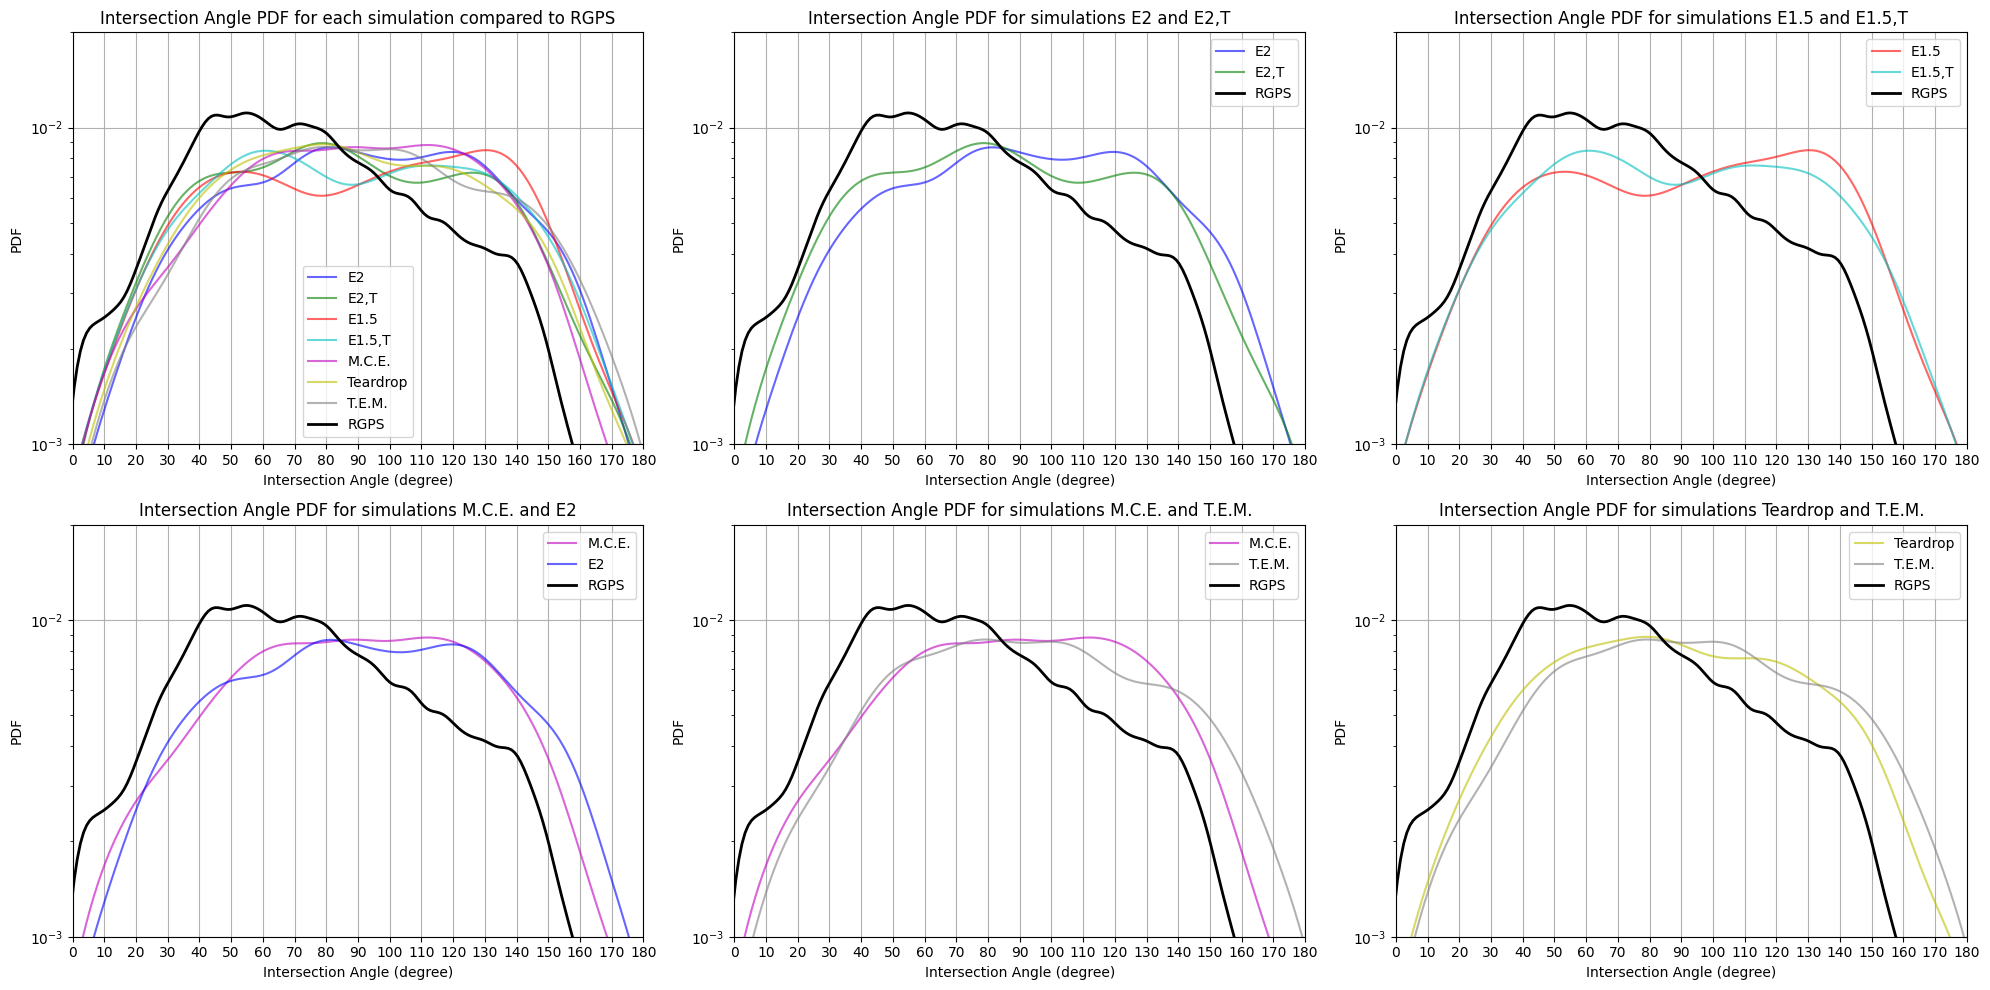

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the simulations to compare
pairs = [(0, 1), (2, 3), (4, 0), (4, 6), (5, 6)]

# Create a figure with 2x3 subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Flatten the axes array for easier access
axs = axs.flatten()

# Plot all simulations and RGPS in the first subplot
for i, simulation_label in enumerate(simulation_labels):
    sns.kdeplot(angles_conj_all_nomask[i], bw_adjust=1, fill=False, alpha=0.6, color=colors[i], label=simulation_label, ax=axs[0])
sns.kdeplot(flattened_angles, bw_adjust=0.5, fill=False, linewidth=2, color='k', label='RGPS', ax=axs[0])
axs[0].legend()
axs[0].set_xlabel('Intersection Angle (degree)')
axs[0].set_ylabel('PDF')
axs[0].set_title('Intersection Angle PDF for each simulation compared to RGPS')
axs[0].set_yscale('log')
axs[0].set_ylim(1e-3, 2e-2)
axs[0].set_xlim(0, 180)
axs[0].set_xticks(np.arange(0, 190, 10))
axs[0].grid()

# Plot each pair in a separate subplot
for idx, (a, b) in enumerate(pairs):
    ax = axs[idx + 1]  # Start from the second subplot
    for i, simulation_label in enumerate([simulation_labels[a], simulation_labels[b]]):
        sns.kdeplot(
            [angles_conj_all_nomask[a], angles_conj_all_nomask[b]][i], 
            bw_adjust=1, 
            fill=False, 
            alpha=0.6, 
            color=[colors[a], colors[b]][i], 
            label=[simulation_labels[a], simulation_labels[b]][i], 
            ax=ax
        )
    # RGPS curve
    sns.kdeplot(flattened_angles, bw_adjust=0.5, fill=False, linewidth=2, color='k', label='RGPS', ax=ax)
    ax.legend()
    
    # Title and axis labels for each subplot
    ax.set_xlabel('Intersection Angle (degree)')
    ax.set_ylabel('PDF')
    ax.set_title(f'Intersection Angle PDF for simulations {simulation_labels[a]} and {simulation_labels[b]}')
    ax.set_yscale('log')
    ax.set_ylim(1e-3, 2e-2)
    ax.set_xlim(0, 180)
    ax.set_xticks(np.arange(0, 190, 10))
    ax.grid()

# Remove unused axes if necessary
for i in range(len(pairs) + 1, len(axs)):
    fig.delaxes(axs[i])

# Adjust the layout
plt.tight_layout()
plt.show()


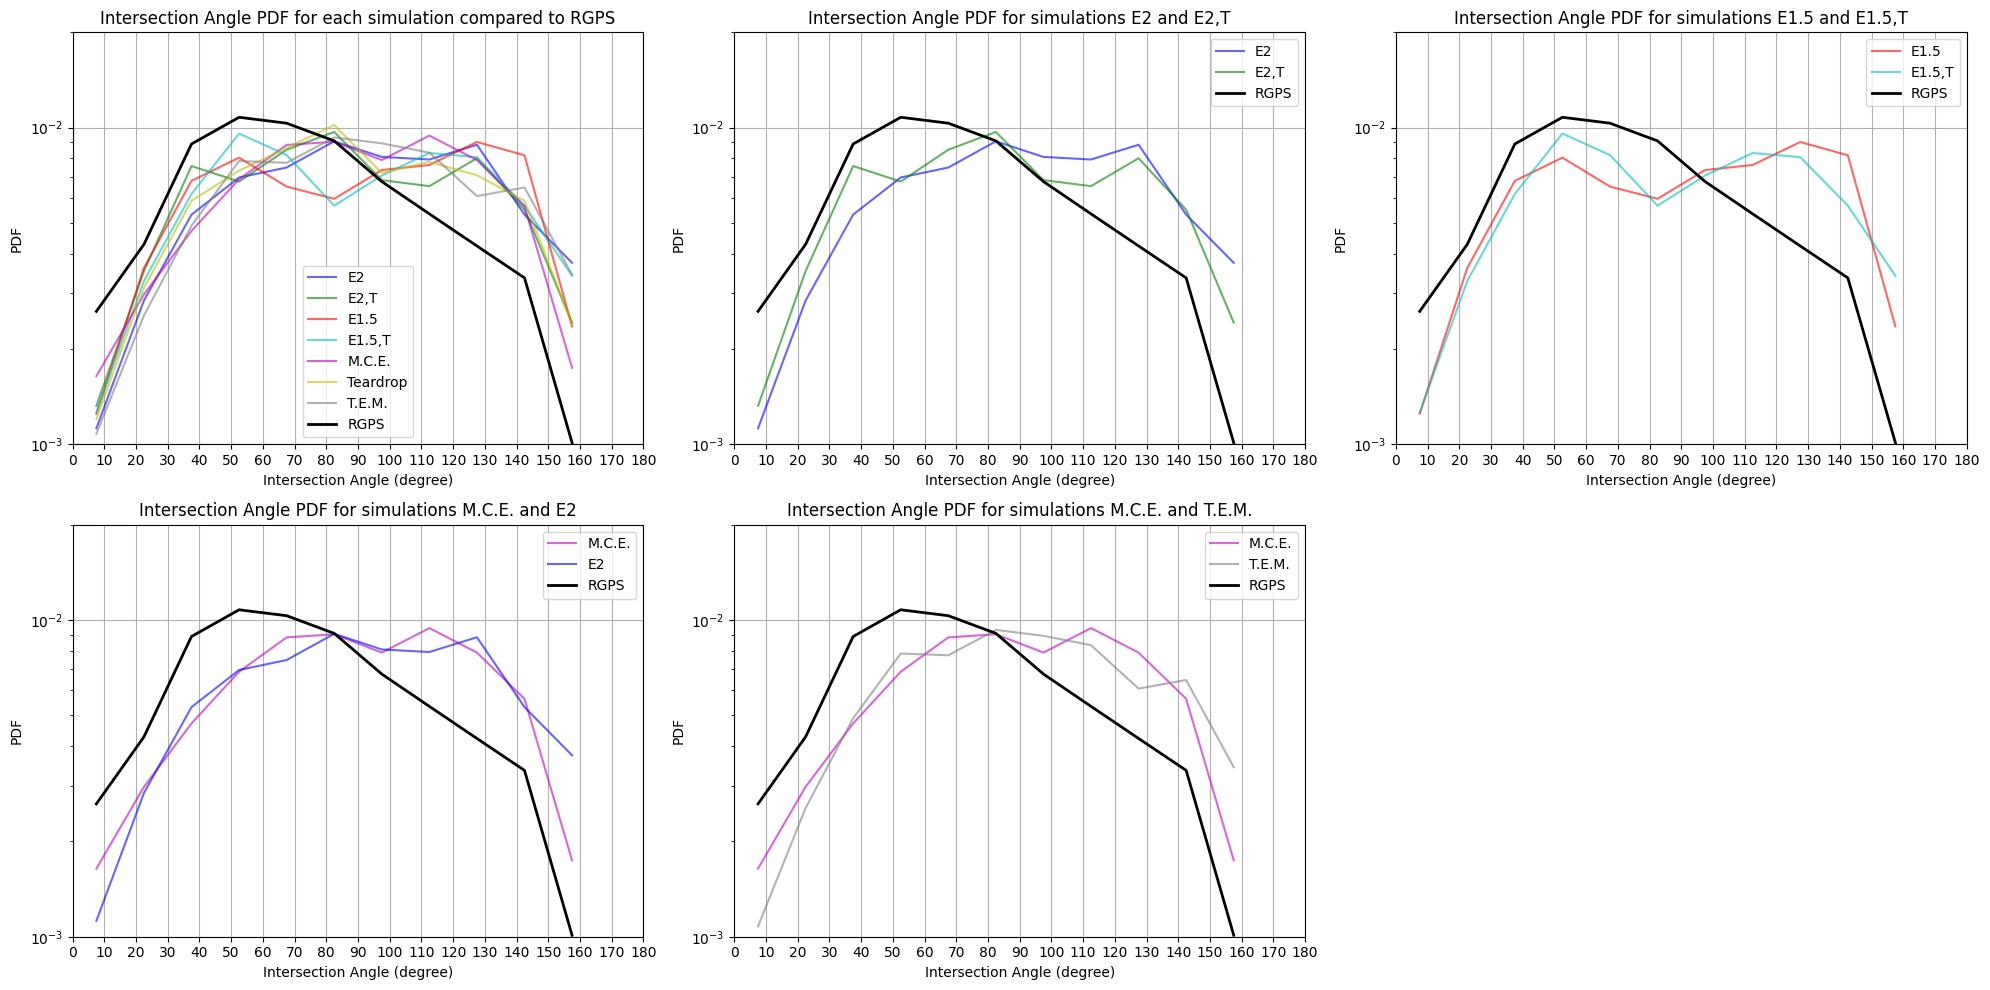

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define the simulations to compare
pairs = [(0, 1), (2, 3), (4, 0), (4, 6), (5, 6)]

# Define bins for histogramm
bins = np.arange(0, 180, 15)

# Create a figure with 2x3 subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Flatten the axes array for easier access
axs = axs.flatten()

# Plot all simulations and RGPS in the first subplot
for i, simulation_label in enumerate(simulation_labels):
        pdf_life, bins_life = np.histogram(angles_conj_all_nomask[i], bins=bins, density=True)
        bins_mean = 0.5 * (bins_life[1:] + bins_life[:-1])
        axs[0].plot(bins_mean, pdf_life, marker=None, color=colors[i], label=simulation_labels[i], alpha=0.6)
        
pdf_life, bins_life = np.histogram(flattened_angles, bins=bins, density=True)
bins_mean = 0.5 * (bins_life[1:] + bins_life[:-1])
axs[0].plot(bins_mean, pdf_life, marker=None, linewidth=2, color='k', label='RGPS')
axs[0].legend()
axs[0].set_xlabel('Intersection Angle (degree)')
axs[0].set_ylabel('PDF')
axs[0].set_title('Intersection Angle PDF for each simulation compared to RGPS')
axs[0].set_yscale('log')
axs[0].set_ylim(1e-3, 2e-2)
axs[0].set_xlim(0, 180)
axs[0].set_xticks(np.arange(0, 190, 10))
axs[0].grid()


# Plot each pair in a separate subplot
for idx, (a, b) in enumerate(pairs):
    ax = axs[idx+1] # Start from the second subplot
    for i in [a, b]:
        pdf_life, bins_life = np.histogram(angles_conj_all_nomask[i], bins=bins, density=True)
        bins_mean = 0.5 * (bins_life[1:] + bins_life[:-1])
        ax.plot(bins_mean, pdf_life, marker=None, color=colors[i], label=simulation_labels[i], alpha=0.6)
    
    # RGPS curve
    pdf_life, bins_life = np.histogram(flattened_angles, bins=bins, density=True)
    bins_mean = 0.5 * (bins_life[1:] + bins_life[:-1])
    ax.plot(bins_mean, pdf_life, marker=None, linewidth=2, color='k', label='RGPS')
    
    ax.legend()
    
    # Title and axis labels for each subplot
    ax.set_xlabel('Intersection Angle (degree)')
    ax.set_ylabel('PDF')
    ax.set_title(f'Intersection Angle PDF for simulations {simulation_labels[a]} and {simulation_labels[b]}')
    ax.set_yscale('log')
    ax.set_ylim(1e-3, 2e-2)
    ax.set_xlim(0, 180)
    ax.set_xticks(np.arange(0, 190, 10))
    ax.grid()

# Remove unused axes if necessary
for i in range(len(pairs), len(axs)):
    fig.delaxes(axs[i])

# Adjust the layout
plt.tight_layout()
plt.show()


In [294]:
from scipy.stats import ks_2samp
# KS test
ks_results = []
for i in range(len(angles_conj_all)):
    ks_stat, p_value = ks_2samp(angles_conj_all_nomask[i], flattened_angles)
    ks_results.append((ks_stat, simulation_labels[i]))

# Find simulation with minimum ks statistics
closest_simulation = min(ks_results, key=lambda x: x[0])

print(f"The simulation closest to the observations is : {closest_simulation[1]} with a KS statistics of : {closest_simulation[0]:.4f}")

La simulation la plus proche des observations est : E2,T avec une statistique KS de 0.1528


In [18]:
from scipy.spatial.distance import jensenshannon
# Estimate PDF using numpy histogram
def estimate_pdf(data, bins=100):
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    return hist, bin_edges

# Compute JS distance for each simulation
js_results = []
pdf_obs, bin_edges_obs = estimate_pdf(flattened_angles)

for i in range(len(angles_conj_all)):
    pdf_sim, _ = estimate_pdf(angles_conj_all[i], bins=bin_edges_obs)
    js_distance = jensenshannon(pdf_obs, pdf_sim)
    js_results.append((js_distance, simulation_labels[i]))

# Find simulation with the smallest JS distance
closest_simulation = min(js_results, key=lambda x: x[0])

print(f"The simulation closest to the observations is : {closest_simulation[1]} with a JS distance of : {closest_simulation[0]:.4f}")

La simulation la plus proche des observations est : Ellipse1 avec une distance JS de 0.3490


In [19]:
from scipy.stats import wasserstein_distance
# Compute Wasserstein distance
wasserstein_results = []
for i in range(len(angles_conj_all)):
    w_distance = wasserstein_distance(flattened_angles, angles_conj_all[i])
    wasserstein_results.append((w_distance, simulation_labels[i]))

# Find siimulation with the smallest Wasserstein distance
closest_simulation = min(wasserstein_results, key=lambda x: x[0])

print(f"The simulation closest to the observations is : {closest_simulation[1]} with a Wasserstein distance of : {closest_simulation[0]:.4f}")

La simulation la plus proche des observations est : Ellipse2 avec une distance de Wasserstein de 11.6321


## LKF length

### Mask

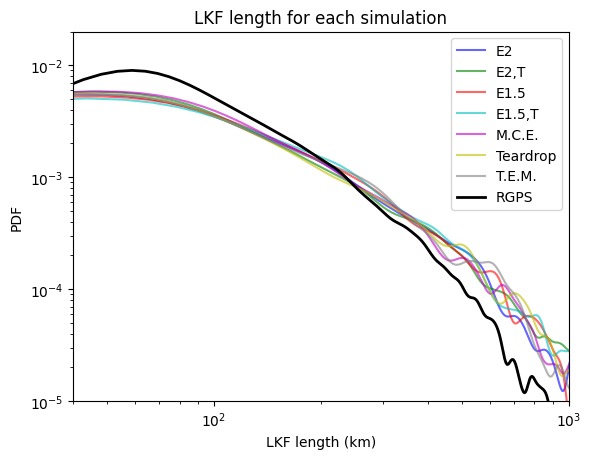

In [37]:
for i, label in enumerate(simulation_labels):
    all_lengths = []
    for day_lengths in lkf_lengths_dict[label].values():
        all_lengths.extend(day_lengths)
    
    all_lengths = np.array(all_lengths)
    sns.kdeplot(all_lengths, bw_adjust=1, fill=False, alpha=0.6, color=colors[i], label=label)

sns.kdeplot(lkf_length['Length'], bw_adjust=1, fill=False, linewidth=2, color='k', label='RGPS', cut=0)

plt.xlabel('LKF length (km)')
plt.ylabel('PDF')
plt.yscale('log')
plt.xscale('log')
plt.xlim(4e1,1e3)
plt.ylim(1e-5,2e-2)
plt.title('LKF length for each simulation')
plt.legend()
plt.show()

### No Mask

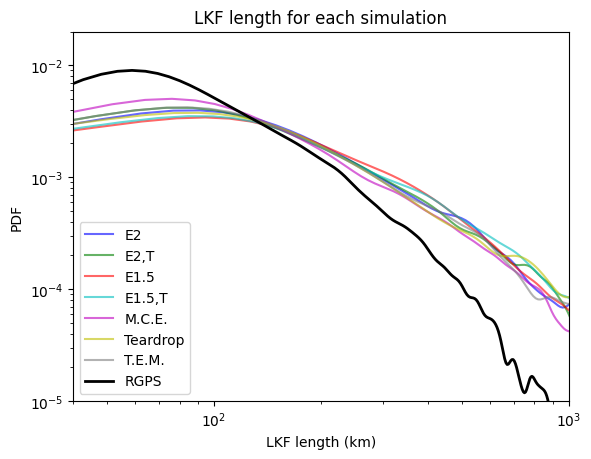

In [38]:
import seaborn as sns
for i, label in enumerate(simulation_labels):
    all_lengths_nomask = []
    for day_lengths_nomask in lkf_lengths_dict_nomask[label].values():
        all_lengths_nomask.extend(day_lengths_nomask)
    
    all_lengths_nomask = np.array(all_lengths_nomask)
    sns.kdeplot(all_lengths_nomask, bw_adjust=1, fill=False, alpha=0.6, color=colors[i], label=label)

sns.kdeplot(lkf_length['Length'], bw_adjust=1, fill=False, linewidth=2, color='k', label='RGPS', cut=0)

plt.xlabel('LKF length (km)')
plt.ylabel('PDF')
plt.yscale('log')
plt.xscale('log')
plt.xlim(4e1,1e3)
plt.ylim(1e-5,2e-2)
plt.title('LKF length for each simulation')
plt.legend(loc='lower left')
plt.show()

In [41]:
for i, simulations_label in enumerate(simulation_labels):
    print(f'LKF mean length : {simulations_label} : {np.round(np.mean(all_lengths[i]),2)} km')

LKF mean length : E2 : 76.94 km
LKF mean length : E2,T : 70.93 km
LKF mean length : E1.5 : 73.17 km
LKF mean length : E1.5,T : 52.37 km
LKF mean length : M.C.E. : 56.21 km
LKF mean length : Teardrop : 70.75 km
LKF mean length : T.E.M. : 61.05 km


In [42]:
for i, simulations_label in enumerate(simulation_labels):
    print(f'LKF mean length : {simulations_label} : {np.round(np.mean(all_lengths_nomask[i]),2)} km')

LKF mean length : E2 : 379.51 km
LKF mean length : E2,T : 89.32 km
LKF mean length : E1.5 : 70.83 km
LKF mean length : E1.5,T : 197.31 km
LKF mean length : M.C.E. : 187.73 km
LKF mean length : Teardrop : 93.94 km
LKF mean length : T.E.M. : 616.28 km


In [43]:
from scipy.stats import ks_2samp
# KS test
ks_results = []
obs_lengths = lkf_length['Length']

for i, label in enumerate(simulation_labels):
    all_lengths = []
    for day_lengths in lkf_lengths_dict[label].values():
        all_lengths.extend(day_lengths)
    all_lengths = np.array(all_lengths)
    
    ks_stat, p_value = ks_2samp(all_lengths, obs_lengths)
    ks_results.append((ks_stat, label))

# Find simulation with smallest KS statistics
closest_simulation = min(ks_results, key=lambda x: x[0])

print(f"The simulation closest to the observations is : {closest_simulation[1]} with as KS statistics of : {closest_simulation[0]:.4f}")

The simulation closest to the observations is : M.C.E. with as KS statistics of : 0.2346


## Lifetime

### Mask

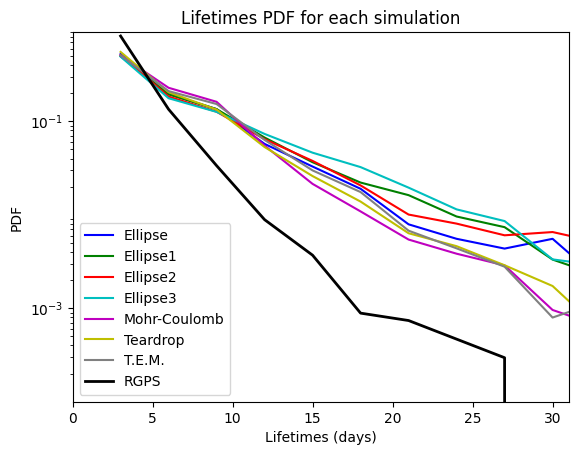

In [167]:
bins = np.arange(0.5,20.5)
for i, simulation_path in enumerate(simulation_paths):
        pdf_life, bins_life = np.histogram(lifetime_all[i], bins=bins, density=True)
        bins_mean = 0.5*(bins_life[1:]+bins_life[:-1])*3.#-1.5
        # Plot PDF Simulation
        plt.plot(bins_mean, pdf_life,marker=None, color=colors[i], label=simulation_labels[i])

# Plot PDF RGPS
pdf_life, bins_life = np.histogram(all_lifetimes, bins=bins, density=True)
bins_mean = 0.5*(bins_life[1:]+bins_life[:-1])*3#.-1.5     *3. bc over 3 days period
#plt.scatter(bins_mean, pdf_life,marker=None,#linestyle=linestyles[i]
#        color='k', label='RGPS', linewidth=2)#,        
#        label='%s (%.2f)' %(io['label'],-coeff[0]))
plt.plot(np.concatenate((bins_mean[:7],bins_mean[8:])), np.concatenate((pdf_life[:7],pdf_life[8:])),marker=None, color='k', label='RGPS', linewidth=2)
plt.yscale('log')
plt.ylim(1e-4,9e-1)
plt.xlim(0,31)
plt.yticks(ticks=[1e-3,1e-1])
plt.ylabel('PDF')
plt.xlabel('Lifetimes (days)')
plt.title('Lifetimes PDF for each simulation')
plt.legend()

### No Mask

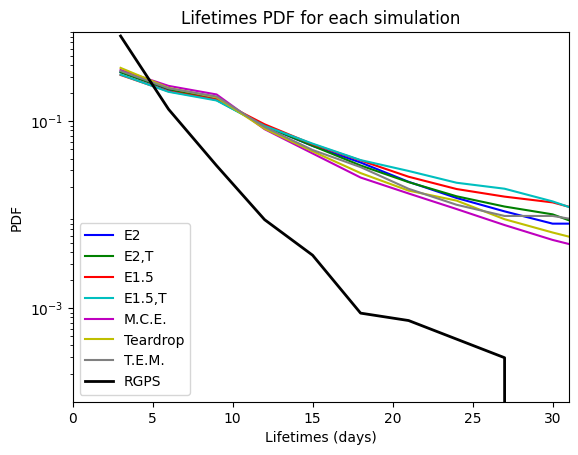

In [315]:
bins = np.arange(0.5,20.5)
for i, simulation_path_nomask in enumerate(simulation_paths_nomask):
        pdf_life, bins_life = np.histogram(lifetime_all_nomask[i], bins=bins, density=True)
        bins_mean = 0.5*(bins_life[1:]+bins_life[:-1])*3.#-1.5
        # Plot PDF Simulation
        plt.plot(bins_mean, pdf_life,marker=None,#linestyle=linestyles[i]
                color=colors[i], label=simulation_labels[i])#,

pdf_life, bins_life = np.histogram(all_lifetimes, bins=bins, density=True)
bins_mean = 0.5*(bins_life[1:]+bins_life[:-1])*3  # *3. bc over 3 days period
# Plot PDF RGPS
#plt.scatter(bins_mean, pdf_life,marker=None,#linestyle=linestyles[i]
#        color='k', label='RGPS', linewidth=2)#,        
#        label='%s (%.2f)' %(io['label'],-coeff[0]))
plt.plot(np.concatenate((bins_mean[:7],bins_mean[8:])), np.concatenate((pdf_life[:7],pdf_life[8:])),marker=None,#linestyle=linestyles[i]
        color='k', label='RGPS', linewidth=2)#,

plt.yscale('log')
plt.ylim(1e-4,9e-1)
plt.xlim(0,31)
plt.yticks(ticks=[1e-3,1e-1])
plt.ylabel('PDF')
plt.xlabel('Lifetimes (days)')
plt.title('Lifetimes PDF for each simulation')
plt.legend()

#### Fit

/tmp/ipykernel_98464/4274938576.py:7: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


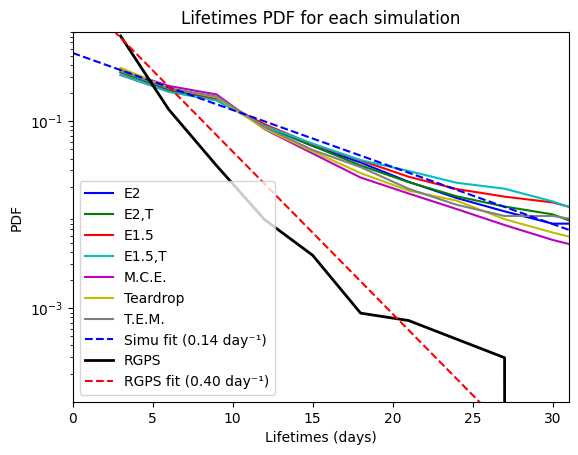

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Exponential function for fitting
def exponential_decay(x, a, b):
    return a * np.exp(-b * x)

# Exponential function with a slope of 0.34
def exponential_decay_04(x, a):
    return a * np.exp(-0.4 * x)

slopes_simulations = []
# Define bins for the histogram
bins = np.arange(0.5, 20.5)

# Plot the PDFs of the simulations
for i, simulation_path_nomask in enumerate(simulation_paths_nomask):
    pdf_life, bins_life = np.histogram(lifetime_all_nomask[i], bins=bins, density=True)
    bins_mean = 0.5 * (bins_life[1:] + bins_life[:-1]) * 3.0  # Adjust the bins
    plt.plot(bins_mean, pdf_life, marker=None, color=colors[i], label=simulation_labels[i])
    popt, pcov = curve_fit(exponential_decay, bins_mean, pdf_life)
    a, b = popt    
    # Retrieve the slope b and add it to the list of slopes
    slopes_simulations.append(b)
x_fit = np.linspace(0, 31, 100)
y_fit = exponential_decay(x_fit, a, np.mean(slopes_simulations))
plt.plot(x_fit, y_fit, 'b--', label='Simu fit (' + str(np.round(np.mean(slopes_simulations), 2)) + ' day⁻¹)')
# Plot the RGPS PDF
pdf_life, bins_life = np.histogram(all_lifetimes, bins=bins, density=True)
bins_mean = 0.5 * (bins_life[1:] + bins_life[:-1]) * 3.0  # Adjust the bins
plt.plot(np.concatenate((bins_mean[:7], bins_mean[8:])), np.concatenate((pdf_life[:7], pdf_life[8:])), marker=None, color='k', label='RGPS', linewidth=2)

# Fit the exponential decay to the RGPS PDF data
# popt, pcov = curve_fit(exponential_decay, bins_mean, pdf_life)
# a, b = popt
# Plot the fitted exponential decay function
# x_fit = np.linspace(0, 31, 100)
# y_fit = exponential_decay(x_fit, a, b)
# plt.plot(x_fit, y_fit, 'r--', label='Exponential Fit')

# Add an exponential curve with a slope of 0.4
popt_04, pcov_04 = curve_fit(exponential_decay_04, bins_mean, pdf_life)
a_04 = popt_04[0]
y_fit_04 = exponential_decay_04(x_fit, a_04)
plt.plot(x_fit, y_fit_04, 'r--', label='RGPS fit (0.40 day⁻¹)')

# Adjust the plot
plt.yscale('log')
plt.ylim(1e-4, 9e-1)
plt.xlim(0, 31)
plt.yticks(ticks=[1e-3, 1e-1])
plt.ylabel('PDF')
plt.xlabel('Lifetimes (days)')
plt.title('Lifetimes PDF for each simulation')
plt.legend()

# Afficher le graphique
plt.show()

In [46]:
# KS test
ks_results = []

for i, label in enumerate(simulation_labels):
    ks_stat, p_value = ks_2samp(lifetime_all[i], all_lifetimes)
    ks_results.append((ks_stat, label))

# Find simulation with the smallest KS statistics
closest_simulation = min(ks_results, key=lambda x: x[0])

print(f"The simulation closest to the observations is : {closest_simulation[1]} with as KS statistics of : {closest_simulation[0]:.4f}")

The simulation closest to the observations is : Teardrop with as KS statistics of : 0.2650


## Map

### eps_tot Maps for Ellipse

In [48]:
def read_binary_file(file_path, shape, dtype='>f4'):
    """
    Reads a binary file and returns a numpy array.
    :param file_path: path to the binary file
    :param shape: shape of the output array
    :param dtype: data type of the binary file
    :return: numpy array with the specified shape and dtype
    """
    with open(file_path, 'rb') as f:
        data = np.fromfile(f, dtype=dtype)
    return data.reshape(shape)
shape = (1536, 1680)
XG_file = '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_elip/XG.data'
YG_file = '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_elip/YG.data'
XG = read_binary_file(XG_file, shape)[::20,::20]
YG = read_binary_file(YG_file, shape)[::20,::20]

In [49]:
import xarray as xr
import numpy as np

# Load simulation data
nc_file = "/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_elip/MITgcm_4km_elip.nc"
data = xr.open_dataset(nc_file)

div = data['div']
shr = data['shr']
aice = data['A']
lon = data['ULON']
lat = data['ULAT']
eps_tot = np.sqrt(div**2+shr**2)

eps_tot = eps_tot.where((aice[1:-1,1:-1]>0) & (aice[1:-1,1:-1]<=1))


# Mask Arctic basin and shrink array
mask = ((((lon > -120) & (lon < 100)) & (lat >= 80)) |
                ((lon <= -120) & (lat >= 70)) |
                ((lon >= 100) & (lat >= 70)))
eps_tot = eps_tot.where(mask[1:-1,1:-1])
#eps_tot = eps_tot[max([0,self.index_y[0][0]-1]):self.index_y[0][-1]+2:self.red_fac,
#                  max([0,self.index_x[0][0]-1]):self.index_x[0][-1]+2:self.red_fac]
eps_tot[:,0,:] = np.nan; eps_tot[:,-1,:] = np.nan
eps_tot[:,:,0] = np.nan; eps_tot[:,:,-1] = np.nan
eps_tot[:,1,:] = np.nan; eps_tot[:,-2,:] = np.nan
eps_tot[:,:,1] = np.nan; eps_tot[:,:,-2] = np.nan

/tmp/ipykernel_98464/944699160.py:13: RuntimeWarning: Mean of empty slice
  colormesh = ax.pcolormesh(lon_l, lat_l, np.nanmean(np.stack(eps_tot_l),axis=0), vmax=0.1,transform=ccrs.PlateCarree())#, cmap = plt.colormaps['Greys'])


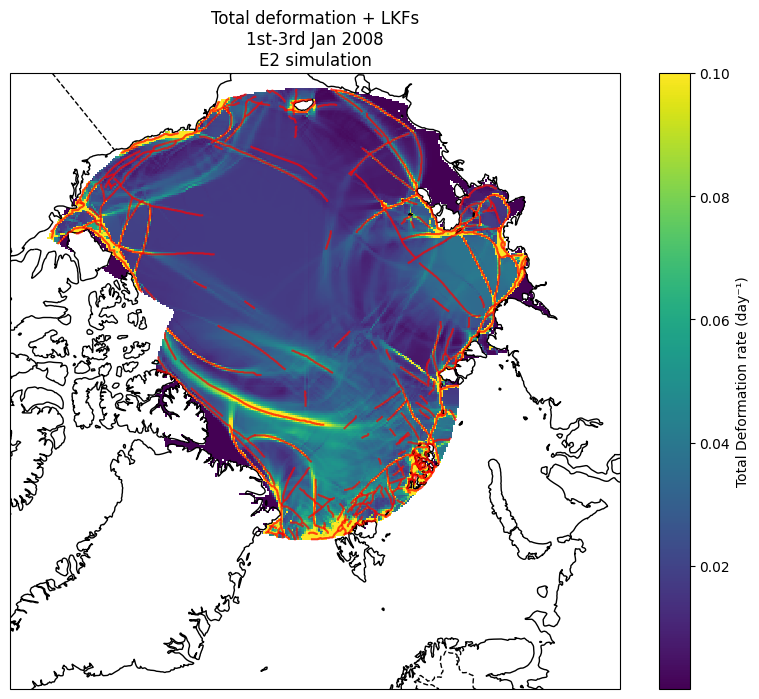

In [59]:
import cartopy 
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pickle
t_red = 3
lon_l = lon[::t_red, ::t_red]
lat_l = lat[::t_red, ::t_red]
eps_tot_l = eps_tot[:3][:,::t_red, ::t_red]

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.Orthographic(0,90))

colormesh = ax.pcolormesh(lon_l, lat_l, np.nanmean(np.stack(eps_tot_l),axis=0), vmax=0.1,transform=ccrs.PlateCarree())#, cmap = plt.colormaps['Greys'])
cbar = plt.colorbar(colormesh, orientation='vertical')
cbar.set_label('Total Deformation rate (day⁻¹)')
with open(simulation_paths_nomask[0], 'rb') as f:
    lkf = pickle.load(f)

for ilkf in lkf.lkf_dataset[0][0]:
        if np.min(ilkf[:,2])<-150 and np.max(ilkf[:,2]>150):
            ilkf[ilkf[:,2]<0,2]+=360
        ax.plot(ilkf[:,2],ilkf[:,3],transform=ccrs.PlateCarree(),color='r',alpha=0.7)

## Tracer les lignes de la grille
#for i in range(XG.shape[0]):
#    ax.scatter(XG[i, :], YG[i, :], transform=ccrs.PlateCarree(), color='red', linewidth=0.05, s=2)
#for j in range(XG.shape[1]):
#    ax.scatter(XG[:, j], YG[:, j], transform=ccrs.PlateCarree(), color='red', linewidth=0.05, s=2)
#ax.plot(XG,YG,linewidth=1,alpha=0.2 ,color='r',transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, 69, 100], crs=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
plt.title('Total deformation + LKFs\n1st-3rd Jan 2008\nE2 simulation' )
#plt.savefig('/home/eva/Documents/AWI/Comparison_RGPS_Simu/Plots/map_eps_tot/map_eps_tot_mohr_grid.svg', dpi=100)
plt.show()


### MCE grid artifacts

In [78]:
shape = (1536, 1680)
XG_file = '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_mohr/XG.data'
YG_file = '/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_mohr/YG.data'
XG = read_binary_file(XG_file, shape)[::50,::50]
YG = read_binary_file(YG_file, shape)[::50,::50]

In [61]:
import xarray as xr
import numpy as np

# Load simulation data
nc_file = "/home/eva/Documents/AWI/Comparison_RGPS_Simu/Simulations_output/new_run/run_mohr/MITgcm_4km_mohr.nc"
data = xr.open_dataset(nc_file)

div = data['div']
shr = data['shr']
aice = data['A']
lon = data['ULON']
lat = data['ULAT']
eps_tot = np.sqrt(div**2+shr**2)

eps_tot = eps_tot.where((aice[1:-1,1:-1]>0) & (aice[1:-1,1:-1]<=1))


# Mask Arctic basin and shrink array
mask = ((((lon > -120) & (lon < 100)) & (lat >= 80)) |
                ((lon <= -120) & (lat >= 70)) |
                ((lon >= 100) & (lat >= 70)))
eps_tot = eps_tot.where(mask[1:-1,1:-1])
#eps_tot = eps_tot[max([0,self.index_y[0][0]-1]):self.index_y[0][-1]+2:self.red_fac,
#                  max([0,self.index_x[0][0]-1]):self.index_x[0][-1]+2:self.red_fac]
eps_tot[:,0,:] = np.nan; eps_tot[:,-1,:] = np.nan
eps_tot[:,:,0] = np.nan; eps_tot[:,:,-1] = np.nan
eps_tot[:,1,:] = np.nan; eps_tot[:,-2,:] = np.nan
eps_tot[:,:,1] = np.nan; eps_tot[:,:,-2] = np.nan

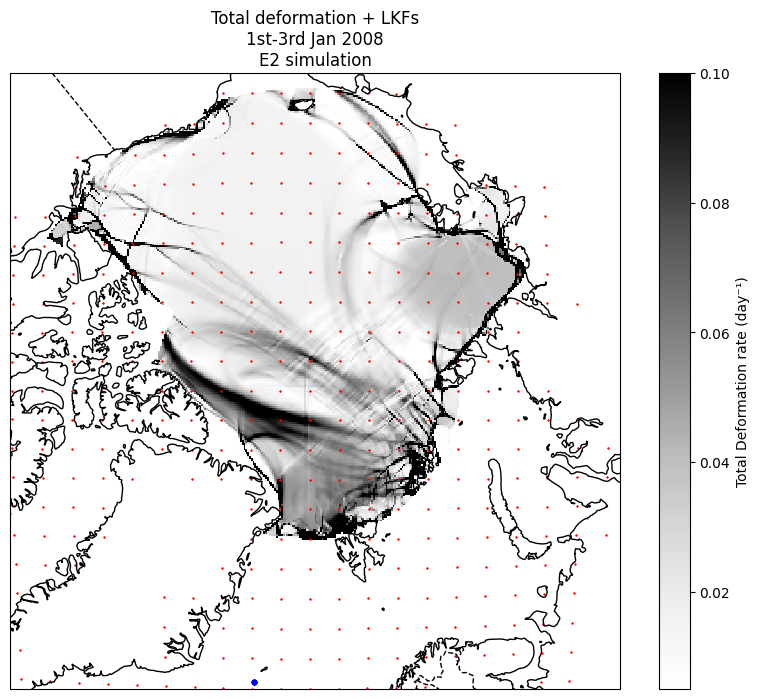

In [105]:
import cartopy 
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle
t_red = 3
lon_l = lon[::t_red, ::t_red]
lat_l = lat[::t_red, ::t_red]
eps_tot_l = eps_tot[1][::t_red, ::t_red]

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.Orthographic(0,90))

# New colormap for more contrast:
greys = plt.get_cmap('Greys')
colors = greys(np.linspace(0, 1, 256))
colors[:10] = mcolors.to_rgba('white')  # The first 10 values closest to white
custom_greys = mcolors.ListedColormap(colors)

colormesh = ax.pcolormesh(lon_l, lat_l, eps_tot_l, vmax=0.1,vmin=0.005,transform=ccrs.PlateCarree(), cmap ='Greys' )#custom_greys)
cbar = plt.colorbar(colormesh, orientation='vertical')
cbar.set_label('Total Deformation rate (day⁻¹)')
with open(simulation_paths_nomask[0], 'rb') as f:
    lkf = pickle.load(f)

# Plot grid lines
for i in range(XG.shape[0]):
    ax.scatter(XG[i, :], YG[i, :], transform=ccrs.PlateCarree(), color='red', linewidth=0.05, s=2)
for j in range(XG.shape[1]):
    ax.scatter(XG[:, j], YG[:, j], transform=ccrs.PlateCarree(), color='red', linewidth=0.05, s=2)
#ax.plot(XG,YG,linewidth=1,alpha=0.2 ,color='r',transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, 69, 100], crs=ccrs.PlateCarree())

rectangle_coords = [[10, 70], [170, 70], [190, 70], [350, 70], [10, 70]]
#rect_lon, rect_lat = zip(*rectangle_coords)
#ax.plot(rect_lon, rect_lat, transform=ccrs.PlateCarree(), color='blue', linewidth=2)
for i in range(len(rectangle_coords)):
               ax.scatter(rectangle_coords[3][0],rectangle_coords[3][1] , transform=ccrs.PlateCarree(), color='blue', s=10)

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
plt.title('Total deformation + LKFs\n1st-3rd Jan 2008\nE2 simulation' )
#plt.savefig('/home/eva/Documents/AWI/Comparison_RGPS_Simu/Plots/map_eps_tot/map_eps_tot_mohr_grid.svg', dpi=100)
plt.show()


In [90]:
rectangle_coords[i][0],rectangle_coords[i][1]

(10, 70)